In [59]:
# ! pip install --upgrade pip
# ! pip install --upgrade git+https://github.com/oda-hub/oda_api@request-list pandas
# ! pip install linked-data-latex
# ! pip install ruamel.yaml
# ! pip install pymosaic-fits


import oda_api.api
import oda_api.token
import oda_api.plot_tools
import requests
import logging
from matplotlib import pylab as plt
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.time import Time
import pandas as pd
import numpy as np
from ddpaper.draftdata import DraftData
import io

# https://gcn.gsfc.nasa.gov/gcn3/32634.gcn3

In [60]:
# oda:version "dev1.11"

In [61]:
# #slightly more verbose
logging.getLogger().setLevel(logging.INFO)
# #all messages
#logging.getLogger().setLevel(logging.DEBUG)

logging.getLogger('oda_api').addHandler(logging.StreamHandler())

In [62]:
# 120711 https://www.aanda.org/articles/aa/pdf/2014/07/aa20872-12.pdf
# https://www.cosmos.esa.int/web/integral/schedule-information

In [63]:
from matplotlib import pylab as plt
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.time import Time
import pandas as pd
import numpy as np

In [64]:
T0_isot = "2022-10-09T13:17:00"
T0_ijd = Time(T0_isot).mjd - 51544

src_coord = SkyCoord("19h 13m 03.43s", "+19d 46m 23.1s", unit=u.deg)
source_name = "GRB221009A"
src_coord

<SkyCoord (ICRS): (ra, dec) in deg
    (288.26429167, 19.77308333)>

In [65]:
with DraftData() as dd:
    dd['sc'] = requests.get(f"https://www.astro.unige.ch/mmoda/dispatch-data/gw/scsystem/api/v1.0/sc/{T0_isot}/{src_coord.ra.deg}/{src_coord.dec.deg}").json()

dd['sc']

{'barytime': 0.14860478635175947,
 'bodies': {'earth': {'body_dec': -69.422,
   'body_distance': 0,
   'body_in_sc': [96.70700691257376, -177.92729061769077],
   'body_ra': 19.505999999999972,
   'body_size': 2.6519059844215565,
   'integral_parallax': 57.29577951308232,
   'separation': 137648.7},
  'moon': {'body_dec': -69.422,
   'body_distance': 378263.6197848711,
   'body_in_sc': [107.42311113501043, 175.44388878344608],
   'body_ra': 19.505999999999972,
   'body_size': 0.2257527511911254,
   'integral_parallax': 17.889794313691343,
   'separation': 440848.53225096094},
  'sun': {'body_dec': -69.422,
   'body_distance': 149429798.59580338,
   'body_in_sc': [67.89812327806959, -3.2523349448476337],
   'body_ra': 19.505999999999972,
   'body_size': 0.2668117335302039,
   'integral_parallax': 0.0527904100405045,
   'separation': 149396255.10412204}},
 'd_scx': 65.81131216259752,
 'd_scy': 148.90559844165924,
 'd_scz': 108.32307498976417,
 'dyz_scy': 159.8406485434722,
 'dyz_scz': 110

In [66]:
acslc_r = requests.get(f"https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/{T0_ijd}/2000")
import pandas as pd
import io

acslc = pd.read_csv(io.StringIO(acslc_r.text), skiprows=5, names=['t', 'dt', 'c', 'ds'], delim_whitespace=True)
acslc

,t,dt,c,ds
0,8317.530324,0.035319,5258.0,45750.851319
1,8317.530325,0.085318,5296.0,45750.901318
2,8317.530326,0.135319,5274.0,45750.951319
3,8317.530326,0.185319,5270.0,45751.001318
4,8317.530327,0.235318,5248.0,45751.051318
...,...,...,...,...
79995,8317.576618,3999.787994,5336.0,49750.603994
79996,8317.576618,3999.837995,5348.0,49750.653995
79997,8317.576619,3999.887997,5396.0,49750.703996
79998,8317.576620,3999.937996,5444.0,49750.753996


In [67]:
src_coord = SkyCoord("19h 13m 03.43s", "+19d 46m 23.1s", unit=u.deg)
source_name = "GRB221009A"
src_coord

<SkyCoord (ICRS): (ra, dec) in deg
    (288.26429167, 19.77308333)>

In [68]:
import subprocess
import io
import pathlib
from astropy.io import fits

def sshopen(fn):
    cfn = pathlib.Path("/tmp/sshopen-cache/") / fn.replace("/", "_")
    cfn.parent.mkdir(exist_ok=True)

    try:
        of = fits.open(cfn)
    except:
        f = io.BytesIO(subprocess.check_output(f"ssh login01.astro.unige.ch tar cf - {fn} | tar xf - -O", shell=True))

        with open(cfn, "wb") as F:
            F.write(f.read())
        
        of = fits.open(cfn)
    return of

sshopen("/isdc/arc/rev_3/scw/2558/255800290010.001/compton_events.fits.gz")


[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x7efccc1c11f0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7efccc1d0fa0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7efccc1d0400>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7efccc1d0dc0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7efccc2eb670>]

In [69]:
ijd2plot = lambda T: (T - T0_ijd)*24*3600

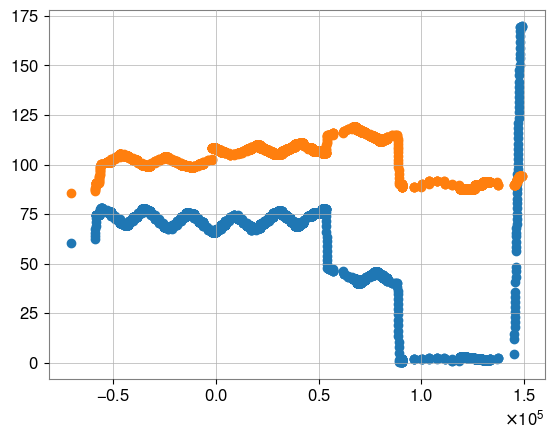

In [70]:
att_hist = sshopen("/isdc/arc/rev_3/aux/adp/2558.001/attitude_historic.fits.gz")[1].data
scx = SkyCoord(att_hist['RA_SCX'], att_hist['DEC_SCX'], unit="deg")
scz = SkyCoord(att_hist['RA_SCZ'], att_hist['DEC_SCZ'], unit="deg")


plt.figure()
plt.scatter(
    ijd2plot(att_hist['TIME']),
    # att_hist['RA_SCX'],
    # att_hist['DEC_SCX']
    scx.separation(src_coord)
)

plt.scatter(
    ijd2plot(att_hist['TIME']),
    # att_hist['RA_SCX'],
    # att_hist['DEC_SCX']
    scz.separation(src_coord)
)
# plt.xlim([-1000, 1000])

In [71]:
mce = dict()

for i in range(8):
    mce[i] = pd.read_csv(
        io.StringIO(requests.get(f"https://www.astro.unige.ch/mmoda/dispatch-data/gw/integralhk/api/v1.0/genlc/ISGRIRAW_MCE{i}/{T0_ijd}/2000").text), 
        skiprows=5, names=['t', 'dt', 'c', 'ds'], delim_whitespace=True)


np.sum([mce[i].c for i in range(8)], axis=0)

array([9415, 9883, 9448, ..., 9744, 9517, 9607])

In [72]:
T0_ijd

8317.553472222222

In [73]:
scw_dict_prompt = pd.DataFrame(requests.get(f"https://www.astro.unige.ch/mmoda/dispatch-data/gw/timesystem/api/v1.0/scwlist/cons/{T0_ijd-500/24/3600}/{T0_ijd+2000/24/3600}?"
             f"ra={src_coord.ra.deg}&dec={src_coord.dec.deg}&radius=200&return_columns=SWID,SW_TYPE,TELAPSE,TSTART,TSTOP").json())


In [74]:
# https://heasarc.gsfc.nasa.gov/docs/integral/ao19-docs-b/AO19_recommended_programme.pdf

In [81]:
picsit_lc = pd.read_csv("picsit/grb221009a_afterglow_picsit_lc.txt", delim_whitespace=True, names=["mjd", "flux"])
picist_hr = pd.read_csv("picsit/grb221009a_afterglow_picsit_hr.txt", delim_whitespace=True, names=["mjd", "hr"])

# plt.plot(
#     (picsit_lc.mjd - (T0_ijd + 51544))*24, 
#     picsit_lc.flux, 
# # )


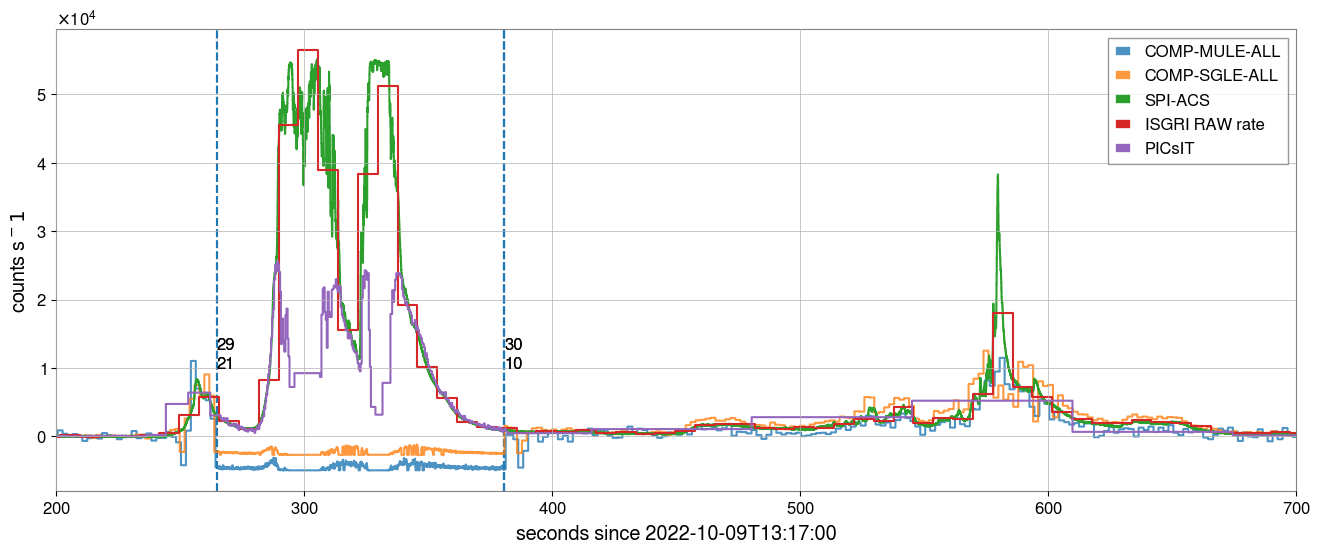

In [98]:
plt.figure(figsize=(16, 6))

from collections import defaultdict

hs_by_et = defaultdict(list)
cs_by_et = defaultdict(list)

compton_event_file = {}
isgri_event_file = {}


for i, r in scw_dict_prompt.iterrows():
    scwid = r.SWID

    compton_event_file[scwid]  = sshopen(f"/isdc/arc/rev_3/scw/{scwid[:4]}/{scwid}.001/compton_events.fits.gz")
    isgri_event_file[scwid]  = sshopen(f"/isdc/arc/rev_3/scw/{scwid[:4]}/{scwid}.001/isgri_events.fits.gz")    
    # compton_event_file[scwid]  = sshopen(f"/isdc/pvphase/nrt/ops/scw/{scwid[:4]}/{scwid}.000/compton_events.fits.gz")
    # isgri_event_file[scwid]  = sshopen(f"/isdc/pvphase/nrt/ops/scw/{scwid[:4]}/{scwid}.000/isgri_events.fits.gz")    

    for C, color, ext, norm in [
                    # (isgri_event_file, 'y', "ISGR-EVTS-ALL", 1),
                    (compton_event_file, 'g', "COMP-MULE-ALL", 1),
                    (compton_event_file, 'r', 'COMP-SGLE-ALL', 1)
                ]:
        c = C[scwid]

        label=ext + " " + scwid
    

        T = c[ext].data['TIME']

        Ei = 0
        Ep = 0

        try:
            Ei = c[ext].data['ISGRI_ENERGY']            
        except:
            pass
        
        try:
            Ep = c[ext].data['PICSIT_ENERGY']
        except:
            pass

        Ec = Ei + Ep

        ijd2plot = lambda T: (T - T0_ijd)*24*3600

        if ijd2plot(r.TSTART) > -100:
            plt.axvline(
                ijd2plot(r.TSTART), ls="--",
            )
            plt.axvline(
                ijd2plot(r.TSTOP), ls="--",
            )

            plt.text(ijd2plot(r.TSTART), 10000, f"{scwid[6:8]}\n{scwid[10:12]}")
            # plt.text(ijd2plot(r.TSTART), 4000, scwid, rotation=90)


        # plt.axvspan(
        #     ijd2plot(r.TSTART),
        #     ijd2plot(r.TSTOP),
        #     alpha=0.2,
        #     color='red'
        # )
    
        h = np.histogram(ijd2plot(T), bins=1000)
        c = (h[1][1:] + h[1][:-1]) / 2.

        hs = hs_by_et[ext]
        cs = cs_by_et[ext]

        hs.append(h[0])
        cs.append(c)

        label = None

for ext in hs_by_et:
    hs = hs_by_et[ext]
    cs = cs_by_et[ext]

    h = np.concatenate(hs)
    c = np.concatenate(cs)

    scale = {"ISGR-EVTS-ALL": 10,
             "COMP-MULE-ALL": 50,
             'COMP-SGLE-ALL': 10 }[ext]


    b = np.mean(h[(c < 200) & (c > 0)])
    plt.step(c, (h - b)*scale, alpha=0.8, label=ext)
    
ijd2plot = lambda t:(t- T0_ijd)*24*3600

# acs_cts2es = 1.5e-10

b = np.mean(acslc.c[(acslc.t- T0_ijd)*24*3600 < 200])
plt.step(ijd2plot(acslc.t), (acslc.c - b)/2, label="SPI-ACS")

isgri_raw_total_rate = np.sum([mce[i].c for i in range(8)], axis=0 )
b = np.mean(isgri_raw_total_rate[(mce[0].t- T0_ijd)*24*3600 < 200])
plt.step((mce[0].t- T0_ijd)*24*3600, isgri_raw_total_rate - b, label="ISGRI RAW rate", where='post')

# picsit

plt.step(
    ijd2plot(picsit_lc.mjd - 51544) + 70, 
    picsit_lc.flux / 0.8e-9, 
    label="PICsIT"
)

plt.xlabel(f"seconds since {T0_isot}")
plt.ylabel(f"counts s$^{-1}$")

# axy2 = plt.twinx()
# axy2.plot(ijd2plot(att_hist['TIME']), scx.separation(src_coord).deg)
# axy2.scatter(ijd2plot(att_hist['TIME']), scx.separation(src_coord).deg)
# axy2.set_ylim([60,75])

# plt.grid(False)

plt.legend()
plt.xlim([200, 700])
plt.savefig("figs/compton.pdf")


In [76]:
scw_dict_prompt['tstart_since_t0_s'] = ijd2plot(scw_dict_prompt.TSTART)
scw_dict_prompt['tstop_since_t0_s'] = ijd2plot(scw_dict_prompt.TSTOP)

In [77]:
scw_dict_prompt.to_dict()

{'SWID': {0: '255800290010', 1: '255800290021', 2: '255800300010'},
 'SW_TYPE': {0: 'POINTING    ', 1: 'SLEW        ', 2: 'POINTING    '},
 'TELAPSE': {0: 1989.00133719435, 1: 116.000076779164, 2: 2001.0013319843},
 'TSTART': {0: 8317.53351369125, 1: 8317.55653454006, 2: 8317.55787713354},
 'TSTOP': {0: 8317.55653454006, 1: 8317.55787713354, 2: 8317.58103687118},
 'tstart_since_t0_s': {0: -1724.417075898964,
  1: 264.584261138225,
  2: 380.58433791738935},
 'tstop_since_t0_s': {0: 264.584261138225,
  1: 380.58433791738935,
  2: 2381.5856699016877}}

In [78]:
lc_pdf="figs/compton.pdf"
T0_isot=T0_isot
data=dict(dd)
scws=scw_dict_prompt.to_dict()
